In [1]:
using CairoMakie
using FourierFlows
using JLD2
using Printf
using StatsBase
include("../AnalysisUtils.jl")
include("../../../rsw/RSWUtils.jl")

compute_rsw_fields (generic function with 1 method)

In [4]:
swqg_predicate = "/scratch/nad9961/swqg/"

rsw_rmss = []
rsw_Cgs = []
rsw_Kds = []
rsw_Lxs = []
rsw_ρs = []
rsw_geo_energies = []

rsw_predicate = "/vast/nad9961/rsw/"
for line=readlines("../rsw_suite/rsw-runs.txt")
    run_directory = split(line, " ")[2]
    println(run_directory)
    f0, Cg2 = read_rsw_params(run_directory)
    nx, Lx = get_grid_size(run_directory, "rsw")
    grid = TwoDGrid(;nx, Lx)
    params = (; f=f0, Cg2)

    Nrsw_snapshots = count_key_snapshots(run_directory, "rsw")
    t0, snapshot = load_key_snapshot(run_directory, "rsw", Nrsw_snapshots)
    uh = @views snapshot[:,:,1]
    vh = @views snapshot[:,:,2]
    ηh = @views snapshot[:,:,3]
    ((ugh, vgh, ηgh), (uwh, vwh, ηwh)) = wave_balanced_decomposition(uh, vh, ηh, grid, params)
    ug = irfft(ugh, grid.nx)
    vg = irfft(vgh, grid.nx)
    ηg = irfft(ηgh, grid.nx)
    rms_u = sqrt.(sum(ug.^2 + vg.^2) * (grid.dx * grid.dy) / grid.Lx/grid.Ly) * (grid.Lx/(2π))^2
    one_plus_η = 1 .+ ηg
    sqrt_one_plus_η = sqrt.(one_plus_η)
    mg1 = sqrt_one_plus_η .* ug
    mg2 = sqrt_one_plus_η .* vg
    mg1h = rfft(mg1)
    mg2h = rfft(mg2)
    mg3h = rfft(one_plus_η)
    geo_E = 0.5 * (abs2.(mg1h) + abs2.(mg2h))# + Cg2*abs2.(mg3h))
    push!(rsw_rmss, rms_u)
    push!(rsw_Cgs, sqrt(Cg2))
    push!(rsw_Lxs, Lx)
    push!(rsw_Kds, f0/sqrt.(Cg2))
    try
        ρ, geo_r = FourierFlows.radialspectrum(geo_E, grid)
        push!(rsw_geo_energies, geo_r)
        push!(rsw_ρs, ρ)
    catch(err)
    end
end

/scratch/nad9961/rsw/57233890/5/
/scratch/nad9961/rsw/57233890/6/
/scratch/nad9961/rsw/57233890/7/
/scratch/nad9961/rsw/57233890/8/
/scratch/nad9961/rsw/57233890/9/
/scratch/nad9961/rsw/57233890/10/
/scratch/nad9961/rsw/57233890/11/
/scratch/nad9961/rsw/57233890/12/
/scratch/nad9961/rsw/57467976/1/
/scratch/nad9961/rsw/57467976/2/
/scratch/nad9961/rsw/57467976/3/
/scratch/nad9961/rsw/57467976/4/
/scratch/nad9961/rsw/57467976/5/
/scratch/nad9961/rsw/57467976/6/
/scratch/nad9961/rsw/57478245/1/
/scratch/nad9961/rsw/57478245/2/
/scratch/nad9961/rsw/57478245/3/
/scratch/nad9961/rsw/57478245/4/
/scratch/nad9961/rsw/57478245/7/
/vast/nad9961/rsw/59916630/1/
/vast/nad9961/rsw/59957924/1/
/vast/nad9961/rsw/59970376/1/
/vast/nad9961/rsw/60577145/
/vast/nad9961/rsw/60839900/
/vast/nad9961/rsw/60979792/
/vast/nad9961/rsw/61087952/
/vast/nad9961/rsw/61126019/
/vast/nad9961/rsw/61132843/
/vast/nad9961/rsw/62081102/
/vast/nad9961/rsw/62085117/
/vast/nad9961/rsw/62189939/
/vast/nad9961/rsw/62221104/


In [5]:
sw_rmss = []
sw_Cgs = []
sw_Lxs = []
sw_ρs = []
sw_Kds = []
sw_geo_energies = []

for line=readlines("raytracing-runs.txt")
    run_directory = swqg_predicate * line
    println(run_directory)
    f0, Cg = read_parameters(run_directory)
    nx, Lx = get_grid_size(run_directory, "swqg")
    grid = TwoDGrid(;nx, Lx)
    Nsnapshots = count_snapshots(run_directory)
    Nqg_snapshots = count_key_snapshots(run_directory, "swqg")
    t, q, _, u, v, _  = load_qgsw_snapshot(run_directory, grid, Nqg_snapshots)
    t, qh, ψh, uh, vh, Kd2  = load_qgswh_snapshot(run_directory, grid, Nqg_snapshots)
    rms_u = sqrt.(sum(u.^2 + v.^2) * (grid.dx * grid.dy) / grid.Lx/grid.Ly) * (grid.Lx/(2π))^2 
    geo_E = 0.5 * (abs2.(uh) + abs2.(vh))# + Kd2*abs2.(ψh))
    ρ, geo_r = FourierFlows.radialspectrum(geo_E, grid)
    push!(sw_rmss, rms_u)
    push!(sw_Cgs, Cg)
    push!(sw_Lxs, Lx)
    push!(sw_Kds, sqrt.(Kd2))
    push!(sw_geo_energies, geo_r)
    push!(sw_ρs, ρ)
end

/scratch/nad9961/swqg/58025661/1
/scratch/nad9961/swqg/58025661/2
/scratch/nad9961/swqg/58025661/3
/scratch/nad9961/swqg/58025661/4
/scratch/nad9961/swqg/58025661/5
/scratch/nad9961/swqg/58025661/6
/scratch/nad9961/swqg/58025661/7
/scratch/nad9961/swqg/58025661/8
/scratch/nad9961/swqg/58025661/9
/scratch/nad9961/swqg/58025661/10
/scratch/nad9961/swqg/58025661/11
/scratch/nad9961/swqg/58025661/12
/scratch/nad9961/swqg/58025661/13
/scratch/nad9961/swqg/58025661/14
/scratch/nad9961/swqg/58025661/15
/scratch/nad9961/swqg/58025661/16
/scratch/nad9961/swqg/58025661/17
/scratch/nad9961/swqg/58025661/18
/scratch/nad9961/swqg/58025661/19
/scratch/nad9961/swqg/58025661/20
/scratch/nad9961/swqg/58031124/1
/scratch/nad9961/swqg/58031124/2
/scratch/nad9961/swqg/58031124/3
/scratch/nad9961/swqg/58031124/4
/scratch/nad9961/swqg/58031124/5
/scratch/nad9961/swqg/58609836/5
/scratch/nad9961/swqg/58625655/7
/scratch/nad9961/swqg/58628043/7
/scratch/nad9961/swqg/59389740/7
/scratch/nad9961/swqg/60030992/7

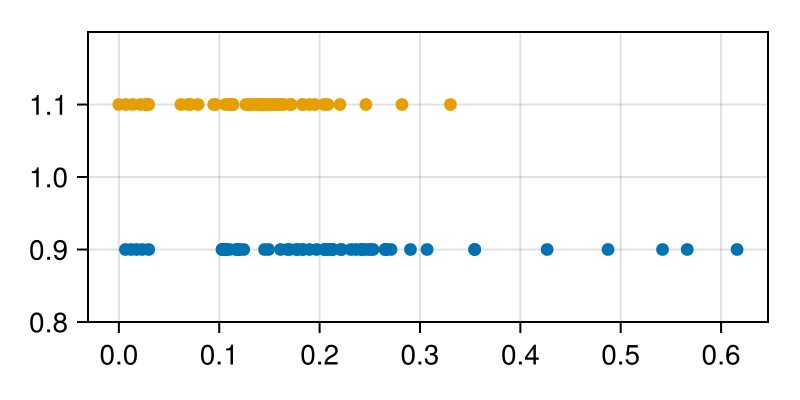

In [22]:
fig = Figure(size=(400, 200))
ax = Axis(fig[1,1]; limits=((nothing, nothing), (0.8, 1.2)))
scatter!(ax, sw_rmss ./ sw_Cgs, 0.9*ones(length(sw_rmss)))
scatter!(ax, rsw_rmss ./ rsw_Cgs, 1.1*ones(length(rsw_rmss)))
fig

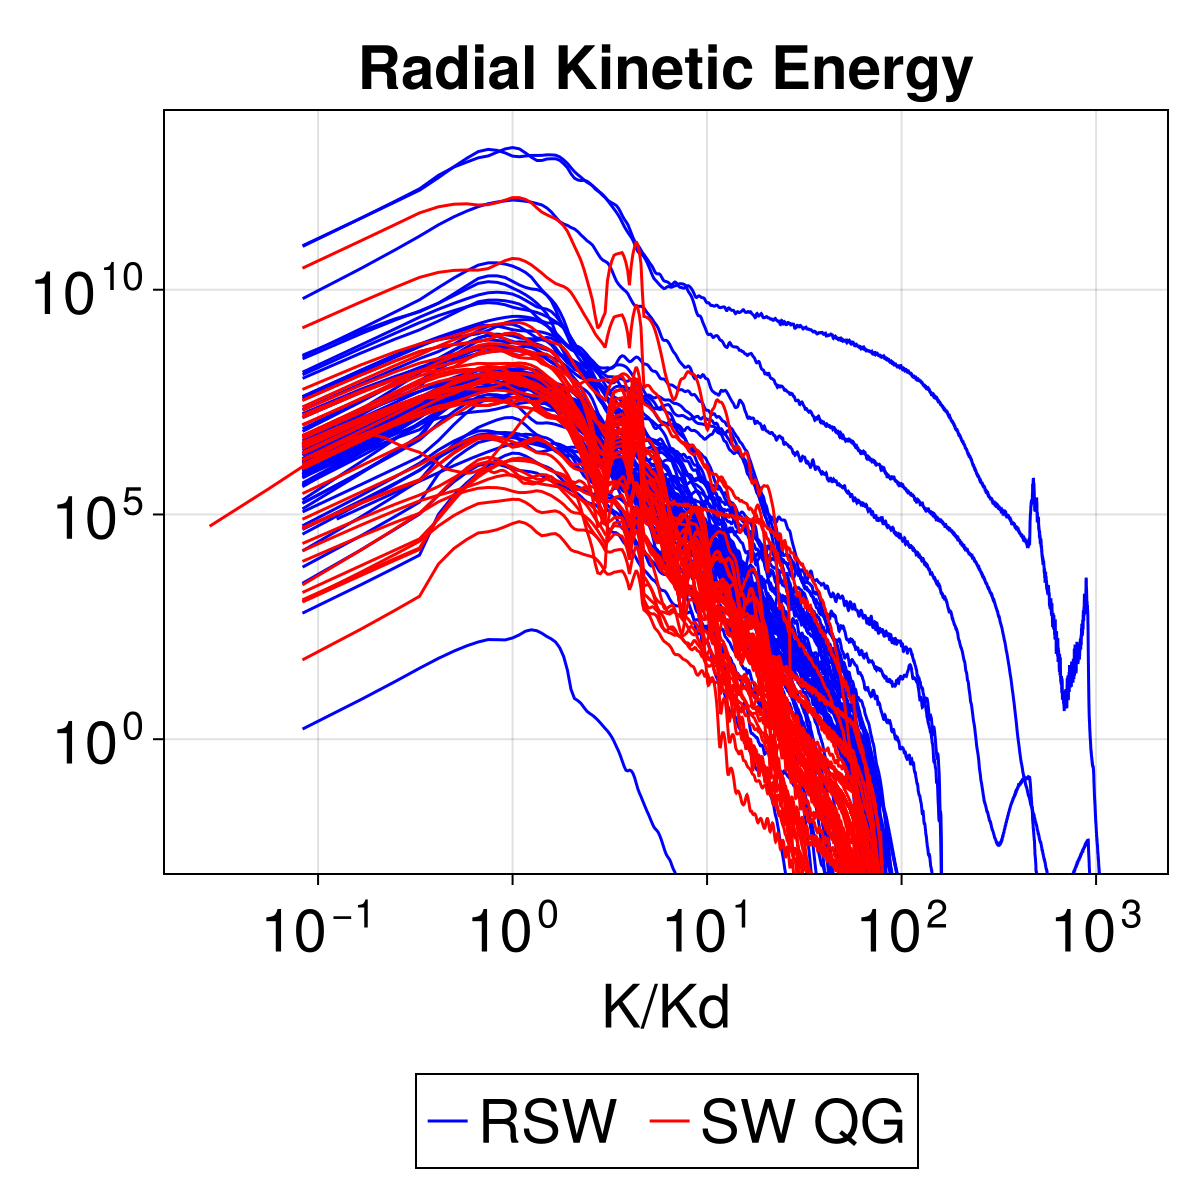

In [14]:
fig = Figure(size=(600, 600), fontsize=30)
ax = Axis(fig[1,1]; xscale=log10, yscale=log10, limits=((nothing, nothing), (1e-3, 1e14)),
    title="Radial Kinetic Energy", xlabel="K/Kd")
for idx=1:length(rsw_geo_energies)
    lines!(ax, rsw_ρs[idx][2:end]/rsw_Kds[idx], rsw_geo_energies[idx][2:end], color=:blue, label="RSW")
end

for idx=1:length(sw_geo_energies)
    lines!(ax, sw_ρs[idx][2:end]/sw_Kds[idx], sw_geo_energies[idx][2:end], color=:red, label="SW QG")
end
Legend(fig[2,1], ax, unique=true, orientation=:horizontal)
fig

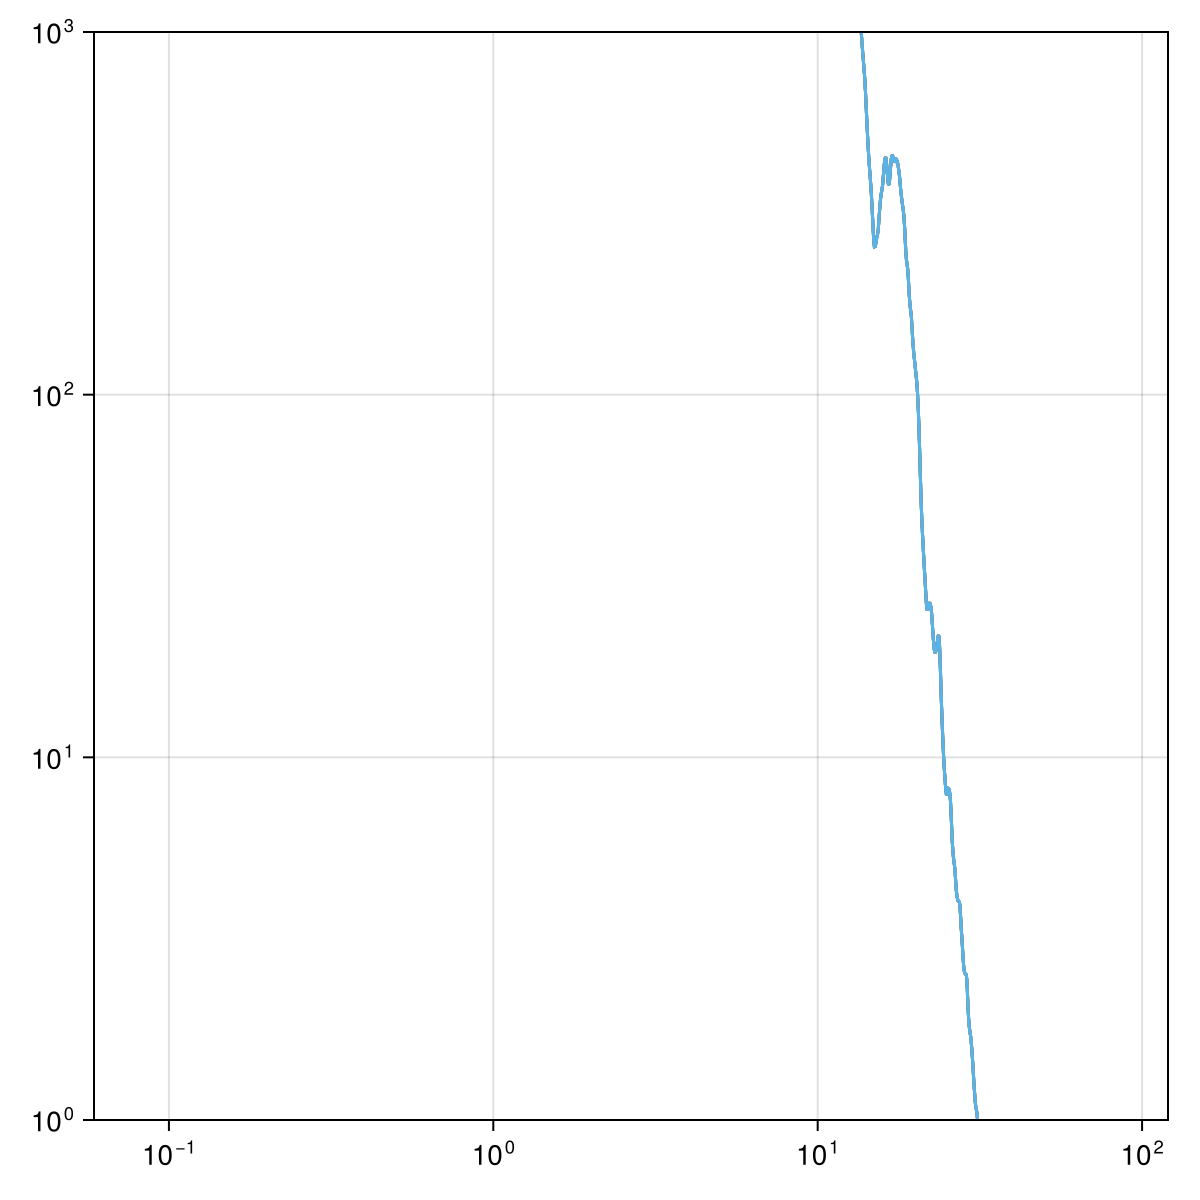

error in running finalizer: ErrorException("task switch not allowed from inside gc finalizer")
ijl_error at /cache/build/tester-amdci5-12/julialang/julia-release-1-dot-11/src/rtutils.c:41
ijl_switch at /cache/build/tester-amdci5-12/julialang/julia-release-1-dot-11/src/task.c:635
try_yieldto at ./task.jl:948
wait at ./task.jl:1022
#wait#731 at ./condition.jl:130
wait at ./condition.jl:125 [inlined]
slowlock at ./lock.jl:157
lock at ./lock.jl:147 [inlined]
close at ./iostream.jl:42
close at /ext3/pkgs/packages/JLD2/SgtOb/src/io/mmapio.jl:169 [inlined]
close at /ext3/pkgs/packages/JLD2/SgtOb/src/JLD2.jl:396
jld_finalizer at /ext3/pkgs/packages/JLD2/SgtOb/src/JLD2.jl:418
unknown function (ip: 0x155423c704d2)
run_finalizer at /cache/build/tester-amdci5-12/julialang/julia-release-1-dot-11/src/gc.c:303
jl_gc_run_finalizers_in_list at /cache/build/tester-amdci5-12/julialang/julia-release-1-dot-11/src/gc.c:393
run_finalizers at /cache/build/tester-amdci5-12/julialang/julia-release-1-dot-11/src/

In [20]:
fig = Figure(size=(600, 600))
ax = Axis(fig[1,1]; xscale=log10, yscale=log10)

fig

## 